In [1]:
%matplotlib widget  

In [50]:
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mpl
from matplotlib.animation import FuncAnimation
import numpy as np
import ipywidgets as ipyw
import math

In [3]:
con = sql.connect("overall_data.db")   
cur = con.cursor()  

def getdata_country(year, things_to_get): 
    things = ', '.join(things_to_get)
    Query=f"SELECT {things} FROM newdata WHERE Year='{year}'"
    cur.execute(Query)
    data= cur.fetchall()   
    return np.array(data).T  


In [4]:
data = getdata_country(2020, ['Country', 'fossil_fuels' ,'population', 'gdp'])
newdata1= data[1].astype(float)
newdata2= data[2].astype(float)
newdata3= data[3].astype(float)

In [65]:
import warnings
warnings.filterwarnings("ignore")

interactive(children=(FloatSlider(value=1970.0, description='Year', max=2020.0, min=1970.0, step=1.0), Output(…

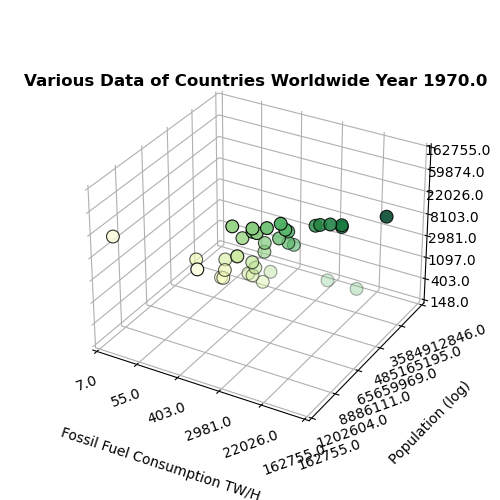

In [66]:
fig1 = plt.figure(figsize=(5,5))
ax1 = fig1.add_subplot(projection='3d')

line = (np.log(newdata2), np.log(newdata1), np.divide((newdata3),(newdata2))) 

    
def update(Year): 
    ax1.clear()
    data = getdata_country(Year, ['Country', 'fossil_fuels', 'population', 'gdp'])
    newdata1= data[1].astype(float)
    newdata2= data[2].astype(float)
    newdata3= data[3].astype(float)
    
    
    ax1.scatter(np.log(newdata1), np.log(newdata2), np.log(np.divide(newdata3, newdata2)), c=np.log(newdata3), cmap='YlGn', alpha=None, s=85,linewidth=0.8, edgecolor='black')
    
    ax1.xaxis.pane.fill = False
    ax1.yaxis.pane.fill = False
    ax1.zaxis.pane.fill = False
    
    ax1.xaxis.pane.set_edgecolor('w')
    ax1.yaxis.pane.set_edgecolor('w')
    ax1.zaxis.pane.set_edgecolor('w')
    
    ax1.axes.set_xlim3d(left=0, right=10) 
    ax1.axes.set_ylim3d(bottom=12, top=22) 
    ax1.axes.set_zlim3d(bottom=5, top=12) 
    
    xlabels=np.round([math.e**2, math.e**4, math.e**6, math.e**8, math.e**10, math.e**12], decimals=0)
    ax1.set_xticklabels(xlabels, minor=False, rotation=20)
    
    ylabels=np.round([math.e**12, math.e**14, math.e**16, math.e**18, math.e**20, math.e**22], decimals=0)
    ax1.set_yticklabels(ylabels, minor=False, rotation=20)
    
    zlabels=np.round([math.e**5, math.e**6, math.e**7, math.e**8, math.e**9, math.e**10, math.e**11, math.e**12], decimals=0)
    ax1.set_zticklabels(zlabels, minor=False)
    
    
    ax1.set_xlabel('Fossil Fuel Consumption TW/H')
    ax1.set_ylabel('Population (log)')
    ax1.set_zlabel('GDP per capita ($)')
    
    ax1.xaxis.labelpad = 20
    ax1.yaxis.labelpad = 20
    ax1.zaxis.labelpad = 20
    plt.tight_layout()
    plt.title(f'Various Data of Countries Worldwide Year {Year}', weight='bold', y=.99)
    fig1.canvas.draw()
    
    
    
    
    
    
    
FloatSlider = ipyw.widgets.FloatSlider(min=1970, max=2020, step=1, value=1970)

ipyw.interact(update, Year=FloatSlider);

